# Project: Investigate Medical Appointment No Shows

## Table of Contents

<ul>
<li><a href="intro">Introduction</a></li>
<ul>

<li><a href="datadict">Data Dictionary</li>
<li><a href="questions">Questions</li>
</ul>
<li><a href="wrangle">Data Wrangling</a></li>
<li><a href="eda">Eploratory Data Analysis</a></li>
<li><a href="conclusion">Conclusions</li>
</ul>

## [Introduction](intro)


In this project we will investigate why a patient would miss their medical appointment and try to
find out if this dataset provides the reason they would miss the appoitment.

<a id="#data dict"></a>

### [Data Dictionary](#datadict)

#### 1. PatientId
-the identification of each patient
##### 2. AppointmentId
-the identification of each appointment
##### 3. Gender
-the sexual orientation of a patient(Male or Female)
##### 4. ScheduledDay
-what day the patient set up their appointment.
##### 5. AppointmentDay
-what day the patient is supposed to see a doctor.
##### 6. Age
-the age of the patient(how old are they?).
##### 7. Neighbourhood
-the location of the hospital.
##### 8. Scholarship
-whether the patient has a Family Allowance(_**Bolsa Família**_)
##### 9. Hypertension
-whether the patient has been diagnosed with hypertension
##### 10. Diabetes
-whether the patient has diabetes
##### 11. Alcoholism
-whether the patient is alcoholic or not
##### 12. Handicap
-whether the patient is handicapped
##### 13. SMS_received
-whether the patient received an SMS for the appointment or not
##### 14. No-show
-whether the patient showed up for the appointment (*No* means the patient showed up for
the appointment and *Yes* means the patient missed the appointment.


### [Questions](#questions)
 -  Are people with hypertension more likely to miss appointments?
 -  Are people who received an SMS more likely to miss their appointment?
 -  Do people with scholarships tend to miss appointments?
 -  Does a neighborhood determine whether one misses an appointment?

### Import the required modules and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
#choose the style of the plots
sns.set_style('darkgrid')


## [Data Wrangling](#wrangle)

In [3]:
# import the dataset and read a few rows to see how the data is set up
df = pd.read_csv('data/noshowappointments.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
# check the columns we have in the dataset
pd.DataFrame(df.columns)

,0
0,PatientId
1,AppointmentID
2,Gender
3,ScheduledDay
4,AppointmentDay
5,Age
6,Neighbourhood
7,Scholarship
8,Hipertension
9,Diabetes


In [5]:
# fix some spelling errors in the columns
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'},inplace=True)
pd.DataFrame(df.columns)

,0
0,PatientId
1,AppointmentID
2,Gender
3,ScheduledDay
4,AppointmentDay
5,Age
6,Neighbourhood
7,Scholarship
8,Hypertension
9,Diabetes


In [6]:
# now that we have fixed the spelling errors we can make the column names lowercase
df.columns = df.columns.str.lower().str.replace('-','_')
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [7]:
df.head(2)


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [8]:
# get the number of rows and columns in the dataset
print('The shape of our dataframe is',df.shape)

The shape of our dataframe is (110527, 14)


In [9]:
# get the statistics about our data
df.describe(include='all')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [10]:
# we see that there is a patient with the age of -1 which is an error
df.age.idxmin()

99832

In [11]:
# let us drop that row
df.drop(99832,inplace=True)

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

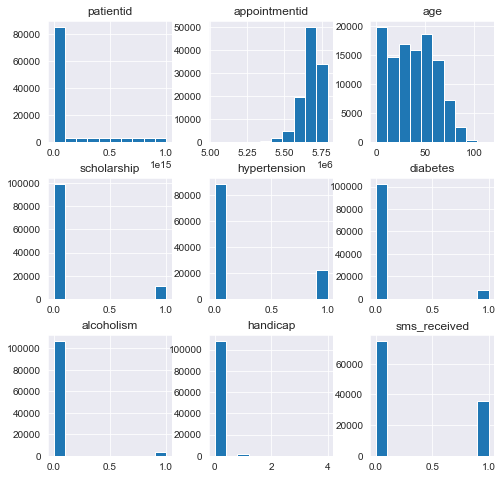

In [12]:
# histogram to show how each variable is distributed
df.hist(figsize=(8,8))
df.handicap.value_counts()
# We find that handicap has 4 categories which shows 4 different types of handicap

In [13]:
# get the data types
df.info()
pd.DataFrame(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110526 non-null  float64
 1   appointmentid   110526 non-null  int64  
 2   gender          110526 non-null  object 
 3   scheduledday    110526 non-null  object 
 4   appointmentday  110526 non-null  object 
 5   age             110526 non-null  int64  
 6   neighbourhood   110526 non-null  object 
 7   scholarship     110526 non-null  int64  
 8   hypertension    110526 non-null  int64  
 9   diabetes        110526 non-null  int64  
 10  alcoholism      110526 non-null  int64  
 11  handicap        110526 non-null  int64  
 12  sms_received    110526 non-null  int64  
 13  no_show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


,0
patientid,float64
appointmentid,int64
gender,object
scheduledday,object
appointmentday,object
age,int64
neighbourhood,object
scholarship,int64
hypertension,int64
diabetes,int64


patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hypertension      0
diabetes          0
alcoholism        0
handicap          0
sms_received      0
no_show           0
dtype: int64


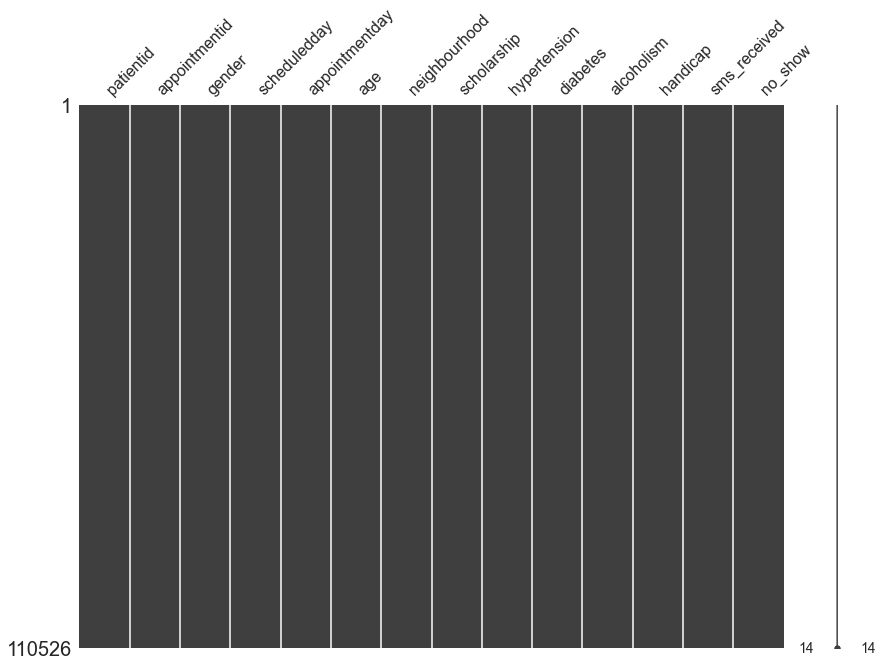

In [14]:
# check for missing values
print(df.isnull().sum())
msno.matrix(df, figsize=(14,10));

In [15]:
# check for duplicates
print('The number of missing values is',df.duplicated().sum())


The number of missing values is 0


#### Data Cleaning
 - drop columns we don't need
 - fix data types

In [16]:
# let's drop some columns that are not useful for our analysis
df.drop(['patientid', 'appointmentid'],axis=1, inplace=True)
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show'],
      dtype='object')

In [17]:
# check the value counts for each variable
cols = ['gender', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show']
for c in cols:
    print(df[c].value_counts())

F    71839
M    38687
Name: gender, dtype: int64
0    99665
1    10861
Name: scholarship, dtype: int64
0    88725
1    21801
Name: hypertension, dtype: int64
0    102583
1      7943
Name: diabetes, dtype: int64
0    107166
1      3360
Name: alcoholism, dtype: int64
0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64
0    75044
1    35482
Name: sms_received, dtype: int64
No     88207
Yes    22319
Name: no_show, dtype: int64


In [18]:
# change the data types in scheduled day and appointment day to the correct data type
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110526 non-null  object             
 1   scheduledday    110526 non-null  datetime64[ns, UTC]
 2   appointmentday  110526 non-null  datetime64[ns, UTC]
 3   age             110526 non-null  int64              
 4   neighbourhood   110526 non-null  object             
 5   scholarship     110526 non-null  int64              
 6   hypertension    110526 non-null  int64              
 7   diabetes        110526 non-null  int64              
 8   alcoholism      110526 non-null  int64              
 9   handicap        110526 non-null  int64              
 10  sms_received    110526 non-null  int64              
 11  no_show         110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


In [19]:
df.scholarship = df.scholarship.astype(bool)
df.hypertension = df.hypertension.astype(bool)
df.diabetes = df.diabetes.astype(bool)
df.alcoholism = df.alcoholism.astype(bool)
df.handicap = df.handicap.astype(bool)
df.sms_received = df.sms_received.astype(bool)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110526 non-null  object             
 1   scheduledday    110526 non-null  datetime64[ns, UTC]
 2   appointmentday  110526 non-null  datetime64[ns, UTC]
 3   age             110526 non-null  int64              
 4   neighbourhood   110526 non-null  object             
 5   scholarship     110526 non-null  bool               
 6   hypertension    110526 non-null  bool               
 7   diabetes        110526 non-null  bool               
 8   alcoholism      110526 non-null  bool               
 9   handicap        110526 non-null  bool               
 10  sms_received    110526 non-null  bool               
 11  no_show         110526 non-null  object             
dtypes: bool(6), datetime64[ns, UTC](2), int64(1), object(3)
memory usage: 6.

> **NB**:

-   We can see from exploring the dataset that there are no missing values and there
are no duplicates.
-   We fixed some data types like dates that are represented
as objects instead of datetime.
-   We dropped columns not required for the analysis
-  There are four categories of handicap that a patient can belong to.
-  The youngest patient is 0 years old, and the oldest is 115 years old.
-  21801 of all the patients have hypertension
- There are 81 different neighbourhoods in the dataset
- Only 22319 patients received an SMS making up 32% of the total number of patients.
- A mere 9% of the patients receive Family Welfare(scholarship)



Now that we have cleaned the data we can start the EDA process.
##  [Exploratory Data Analysis](#eda)

No     88207
Yes    22319
Name: no_show, dtype: int64


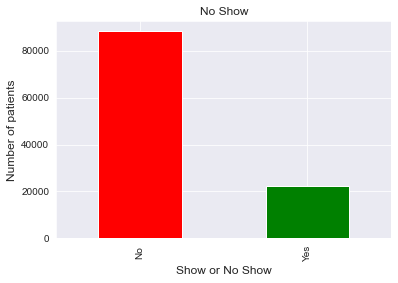

In [20]:
print(df.no_show.value_counts())
df.no_show.value_counts().plot(kind='bar',color=['red','green'])
plt.title('No Show',fontsize=12)
plt.ylabel('Number of patients',fontsize=12)
plt.xlabel('Show or No Show',fontsize=12);

_**We can see how the no show column is distibuted. 88207 patients showed up for their
appointments while 22319 patients did not.**_

In [21]:
not_showed_up =df.query('no_show == "Yes"') # data no show patients
showed_up = df.query('no_show == "No"') # data of patients who showed
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show'],
      dtype='object')

In [22]:
not_showed_up.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,False,False,False,False,False,False,Yes


In [23]:
showed_up.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No


In [24]:
# function to show the percentage distribution of each variable
def percentage_dist(x):
    return showed_up[x].value_counts()/showed_up[x].value_counts().sum()

# function to plot graphs of no show patients
def plotter(dataframe):
   dataframe.no_show.value_counts().plot(kind='bar',figsize=(6,8))



In [25]:
# change the no show column to 1 and 0 for no show and show respectively
df.loc[:,'no_show'] = df.loc[:,'no_show'].apply(lambda x: 0 if x == 'No' else 1)


### 1. Are people with hypertension more likely to miss appointments?

In [26]:
# get the number of patients with hypertension
hyp = df.hypertension.value_counts()/df.hypertension.value_counts().sum()
print(f"The percentage of patients with hypertension is {hyp[1]} compared to those without that is {hyp[0]}.")

The percentage of patients with hypertension is 0.19724770642201836 compared to those without that is 0.8027522935779816.


hypertension
False    0.209039
True     0.173020
Name: no_show, dtype: float64


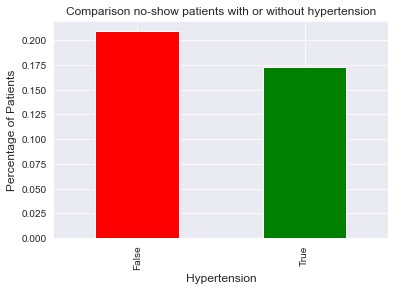

In [27]:
# we can get the no show and show rates for people with and without hypertension
print(df.groupby('hypertension').mean().loc[:,'no_show'])
df.groupby('hypertension').mean().loc[:,'no_show'].plot(kind='bar',color=['red','green'])
plt.title('Comparison no-show patients with or without hypertension',fontsize=12)
plt.ylabel('Percentage of Patients',fontsize=12)
plt.xlabel('Hypertension',fontsize=12);

In [28]:
# we see that 20% of the no show are people without hypertension while 17% of the no show have hypertension

The percentage of patients with hypertension is 0.19724770642201836 compared to those without that is 0.8027522935779816.


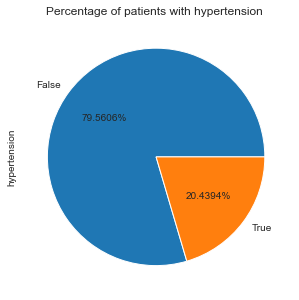

In [29]:
print(f"The percentage of patients with hypertension is {hyp[1]} compared to those without that is {hyp[0]}.")

# distribution of patients with or without hypertension
percentage_dist('hypertension').plot(kind='pie',figsize=(6,5),autopct='%1.4f%%')
plt.title('Percentage of patients with hypertension ',fontsize=12);

In [30]:
hypertension_yes =df.query('hypertension == True')

hypertension_yes.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,0


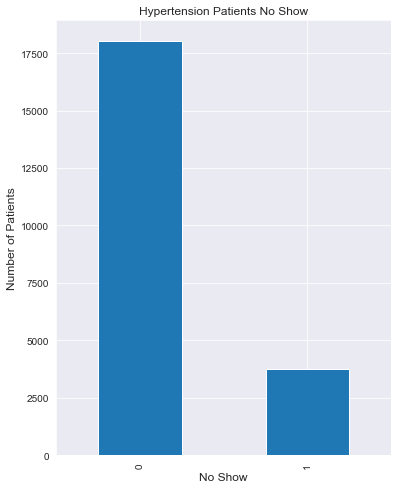

In [31]:
# plot of patients with hypertension that either showed up or did not
plotter(hypertension_yes)
plt.ylabel('Number of Patients',  fontsize=12)
plt.xlabel('No Show',fontsize=12)
plt.title('Hypertension Patients No Show', fontsize=12);

**_It seems that patients with hypertension tend
to show up to their appointments._**

### 2. Are people who received an SMS more likely to miss their appointment?



In [32]:
sms_yes = df.query('sms_received == True')# patients who received an sms
sms_yes.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,False,False,False,False,False,True,1


In [33]:
sms = df.sms_received.value_counts()/df.sms_received.value_counts().sum()
sms
#

False    0.678971
True     0.321029
Name: sms_received, dtype: float64

sms_received
False    0.167035
True     0.275745
Name: no_show, dtype: float64


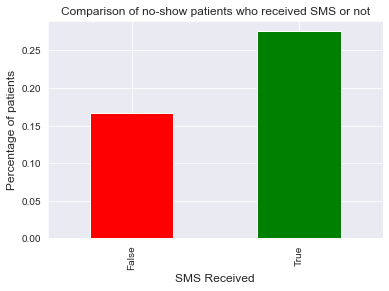

In [34]:
# let's see how the no show compare between patients who received an sms and those who did not
print(df.groupby('sms_received').mean().loc[:,'no_show'])
df.groupby('sms_received').mean().loc[:,'no_show'].plot(kind='bar',color=['red','green'])
plt.title('Comparison of no-show patients who received SMS or not',fontsize=12)
plt.ylabel('Percentage of patients',fontsize=12)
plt.xlabel('SMS Received',fontsize=12);

In [35]:
# We can see that 27% of the no show received an SMS while 16% of the no show did not receive an sms

The percentage of patients who received an sms is 0.3210285362720084 to those who did not which is 0.6789714637279916.


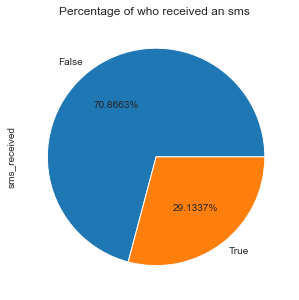

In [36]:
print(f'The percentage of patients who received an sms is {sms[1]} to those who did not which is {sms[0]}.')

percentage_dist('sms_received').plot(kind='pie',figsize=(6,5),autopct='%1.4f%%')
plt.title('Percentage of who received an sms ',fontsize=12);

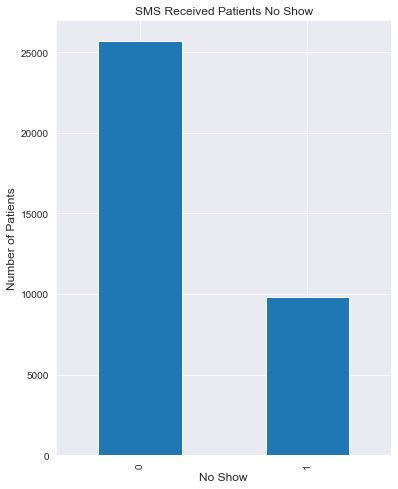

In [37]:
plotter(sms_yes)
plt.ylabel('Number of Patients',  fontsize=12)
plt.xlabel('No Show',fontsize=12)
plt.title('SMS Received Patients No Show', fontsize=12);

_**This graph shows that most of the patients who received an SMS showed up for there appointments.**_

### 3. Do people with scholarships tend to miss appointments?

In [38]:
scholarship_yes = df.query('scholarship == True')
scholarship_yes.no_show.value_counts()

0    8283
1    2578
Name: no_show, dtype: int64

In [39]:
schol = df.scholarship.value_counts()/df.scholarship.value_counts().sum()
schol
print(f'The percentage of people with scholarship is {schol[1]} while those without is {schol[0]}')

The percentage of people with scholarship is 0.09826647123753687 while those without is 0.9017335287624632


scholarship
False    0.198074
True     0.237363
Name: no_show, dtype: float64


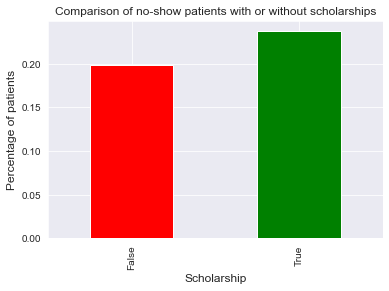

In [40]:
# comparison between no shows that did or did not have scholarships
print(df.groupby('scholarship').mean().loc[:,'no_show'])
df.groupby('scholarship').mean().loc[:,'no_show'].plot(kind='bar',color=['red','green'])
plt.title('Comparison of no-show patients with or without scholarships',fontsize=12)
plt.ylabel('Percentage of patients',fontsize=12)
plt.xlabel('Scholarship',fontsize=12);

In [41]:
# We can see that 23% of the no shows are patients with scholarships
# while 19% of the no shows do not have scholarships

The percentage of people with scholarship is 0.09826647123753687 while those without is 0.9017335287624632


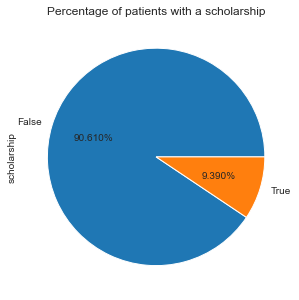

In [42]:
print(f'The percentage of people with scholarship is {schol[1]} while those without is {schol[0]}')
percentage_dist('scholarship').plot(kind='pie',figsize=(6,5),autopct='%1.3f%%')
plt.title('Percentage of patients with a scholarship');

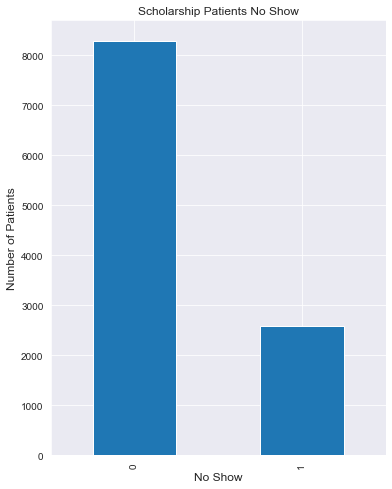

In [43]:
# plot for scholarship no show
plotter(scholarship_yes)
plt.ylabel('Number of Patients',  fontsize=12)
plt.xlabel('No Show',fontsize=12)
plt.title('Scholarship Patients No Show', fontsize=12);

_**From this we can see that a small percentage of patients with scholarships miss their appointments.**_

### 4. Does a neighborhood determine whether one misses an appointment?

In [44]:
df.neighbourhood.nunique()

81

In [45]:
count = df.groupby('neighbourhood')['no_show'].value_counts()
pd.DataFrame(count)

no_show
neighbourhood   no_show         
AEROPORTO       0              7
                1              1
ANDORINHAS      0           1741
                1            521
ANTÔNIO HONÓRIO 0            221
...                          ...
TABUAZEIRO      1            573
UNIVERSITÁRIO   0            120
                1             32
VILA RUBIM      0            710
                1            141

[160 rows x 1 columns]

In [46]:
# percentage of no show or show in each neighbourhood
(count/count.groupby(level=0).sum() * 100).unstack()

no_show,0,1
neighbourhood,,
AEROPORTO,87.500000,12.500000
ANDORINHAS,76.967286,23.032714
ANTÔNIO HONÓRIO,81.549815,18.450185
ARIOVALDO FAVALESSA,78.014184,21.985816
BARRO VERMELHO,78.486998,21.513002
...,...,...
SÃO JOSÉ,78.351037,21.648963
SÃO PEDRO,78.962418,21.037582
TABUAZEIRO,81.704981,18.295019


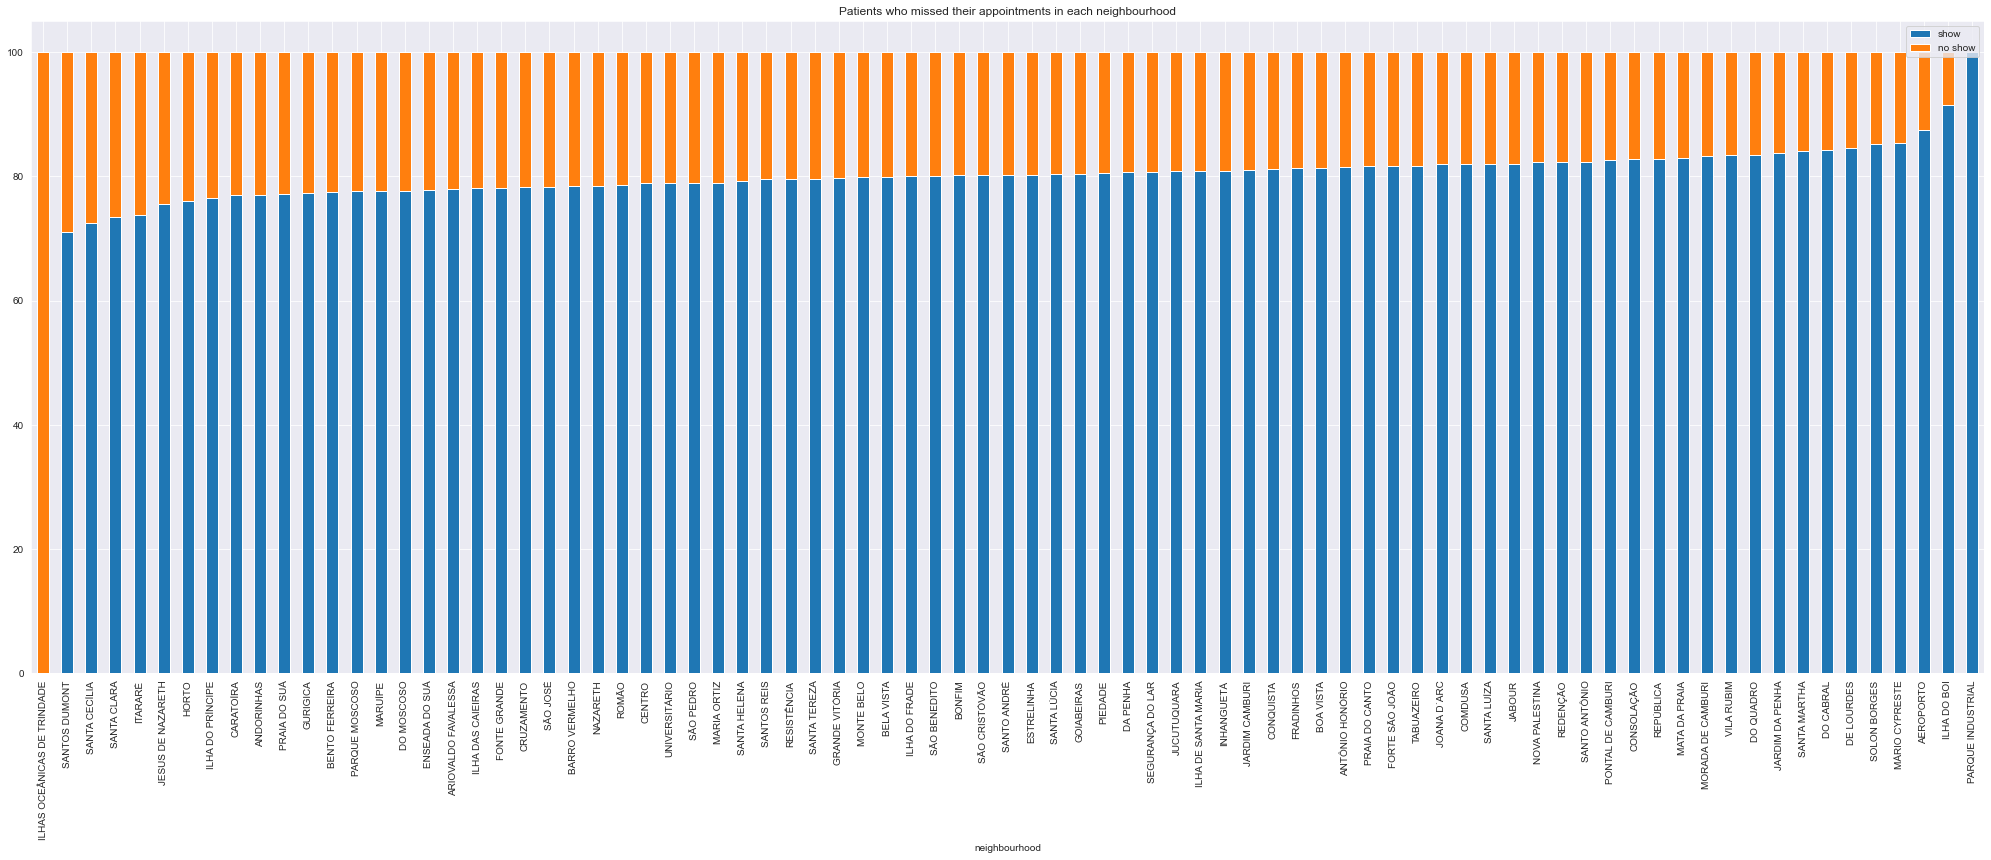

In [47]:
(count/count.groupby(level=0).sum() * 100).unstack().sort_values(by=1,ascending=False).plot(kind='bar',stacked=True,figsize=(35,12))
plt.title('Patients who missed their appointments in each neighbourhood');
plt.legend(['show','no show'],loc='upper right');

_**We can see that for most neighbourhoods, patients attend their appointments except two neighbourhoods which seem to be outliers.**_


## [Conclusions](#conclusion)

>  _**We investigated why some patients miss their appointments and came up with the following:**_
-   a large percentage of patients with hypertension tend not to miss their appointments.
-   the percentage of no show patients and have hypertension is smaller than the percentage o
    no show patients without hypertension in comparison with those who showed
    up in both categories.
-   the percentage of no show patients who received an SMS is larger than the percentage
    of no show patients who did not receive an SMS in comparison to those who showed up in both categories.
-   the percentage of no show patients with scholarships is larger than that of no show
    patients without scholarships in comparison to patients who showed up in
    both categories.
-   a neighbourhood does not necessarily determine whether a patient misses their appointment with the doctor.

### References
- Stackoverflow
- Kaggle.com
- Pandas Documentation
- Matplotlob Documentation
- Python Documentation

